<a href="https://colab.research.google.com/github/Saybuuu/colab/blob/main/Sales_Category_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этот проект использует набор данных о продажах для предсказания категорий товаров на основе деталей заказов, таких как сумма, количество, подкатегория, способ оплаты и местоположение. Процесс включает предварительную обработку данных, кодирование меток, обучение моделей с использованием различных алгоритмов машинного обучения, а также оценку с помощью матриц ошибок и показателей точности.

# Import data


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
path = '/content/drive/MyDrive/Sales Category Prediction Using ML/Sales Dataset.csv'
df = pd.read_csv(path)

In [41]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [43]:
df.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [44]:
df.isnull().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0
PaymentMode,0
Order Date,0
CustomerName,0
State,0


In [45]:
df.shape

(1194, 12)

In [46]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

# Vizualization

<Axes: xlabel='Year-Month', ylabel='Amount'>

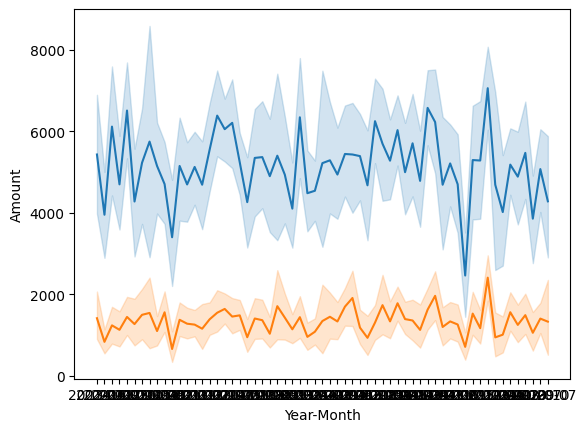

In [47]:
sns.lineplot(data=df, x='Year-Month', y='Amount')
sns.lineplot(data=df, x='Year-Month', y='Profit')

<Axes: xlabel='Sub-Category'>

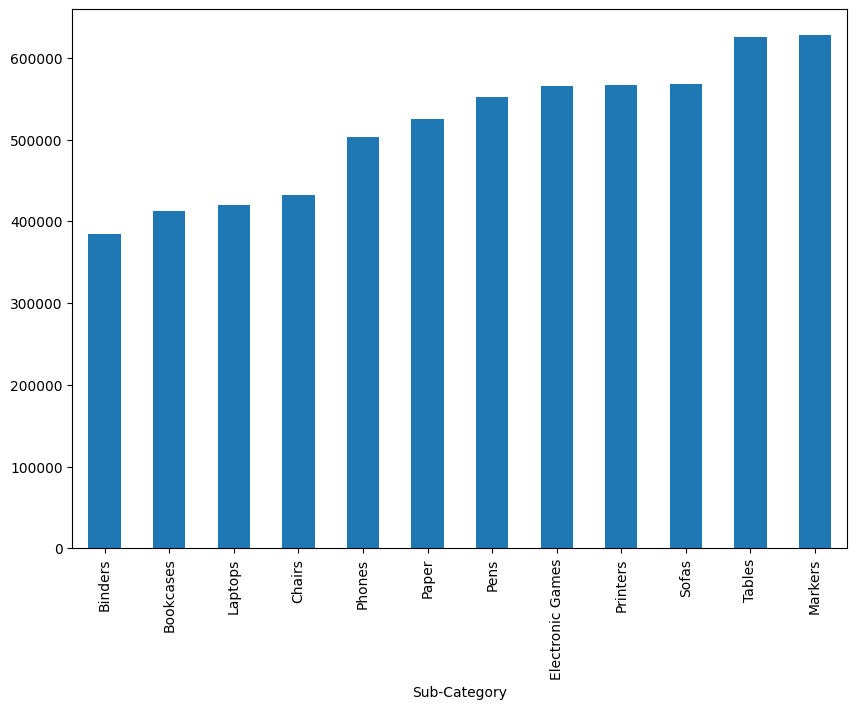

In [48]:
df.groupby('Sub-Category')['Amount'].sum().sort_values().plot(kind='bar', figsize=(10,7))

<Axes: ylabel='Category'>

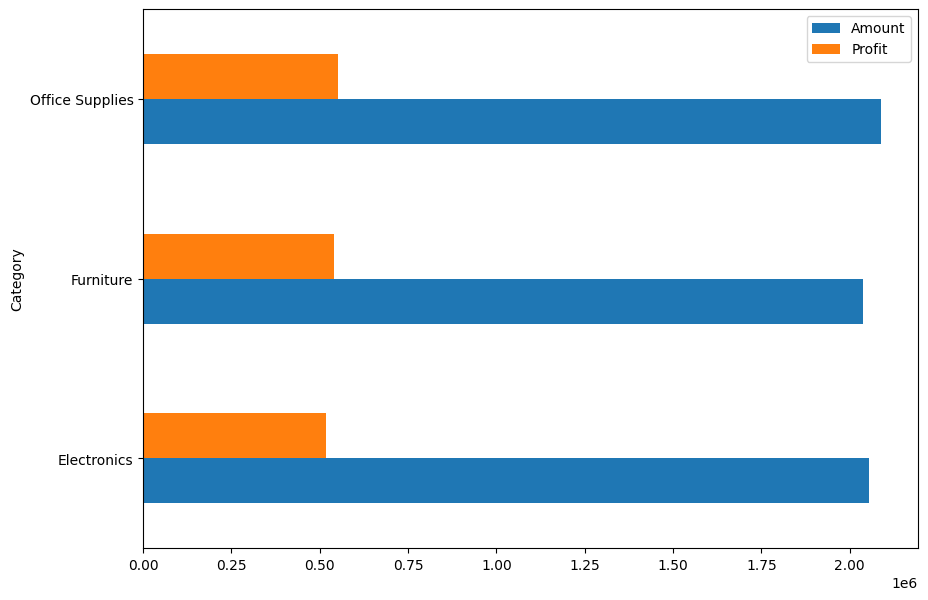

In [49]:
df.groupby('Category')[['Amount', 'Profit']].sum().plot(kind='barh', figsize=(10, 7))

<Axes: xlabel='Quantity', ylabel='Count'>

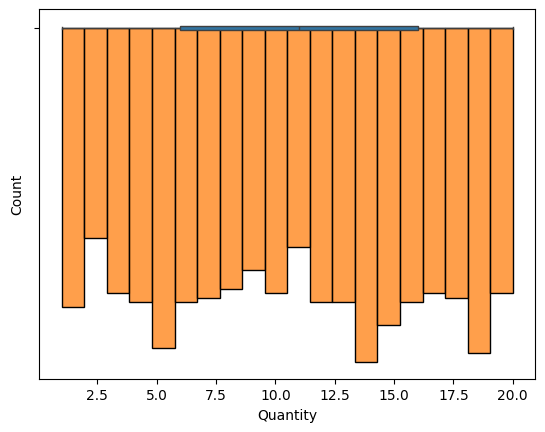

In [50]:
sns.boxplot(x='Quantity', data=df)
sns.histplot(df['Quantity'], bins=20)

<Axes: xlabel='Amount', ylabel='Count'>

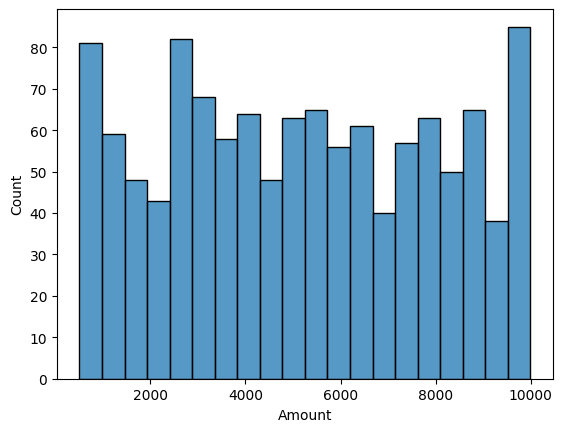

In [51]:
sns.histplot(df['Amount'], bins=20)

<Axes: ylabel='State'>

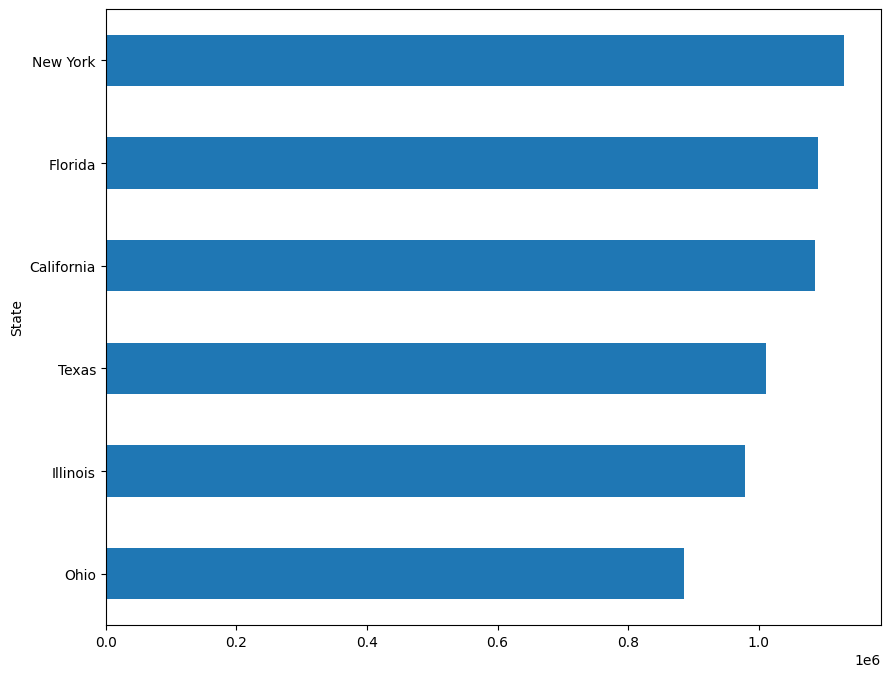

In [52]:
df.groupby('State')['Amount'].sum().sort_values().plot(kind='barh', figsize=(10,8))

<Axes: xlabel='City'>

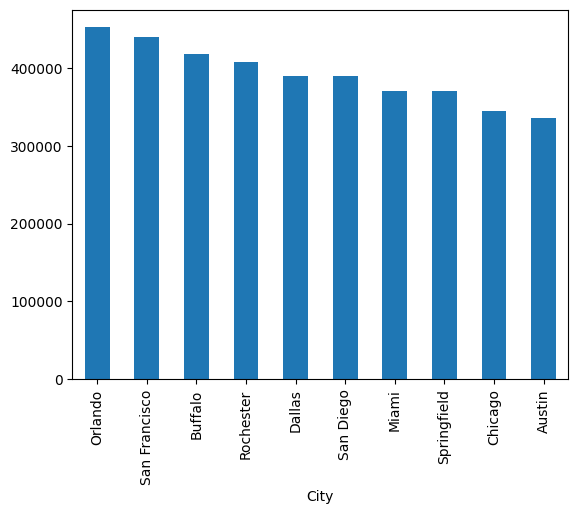

In [53]:
top_cities = df.groupby('City')['Amount'].sum().nlargest(10)
top_cities.plot(kind='bar')

<Axes: xlabel='PaymentMode', ylabel='count'>

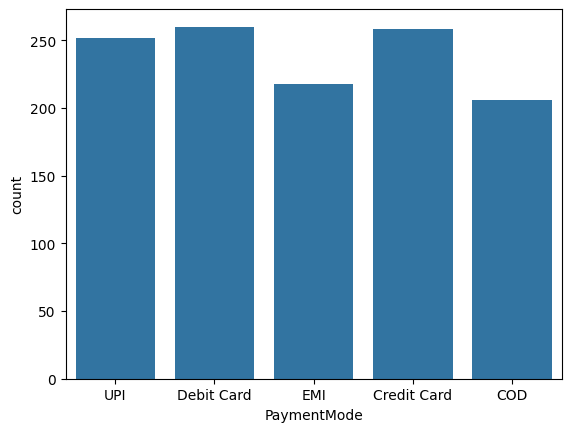

In [54]:
sns.countplot(x='PaymentMode', data=df)

<Axes: xlabel='Amount', ylabel='Profit'>

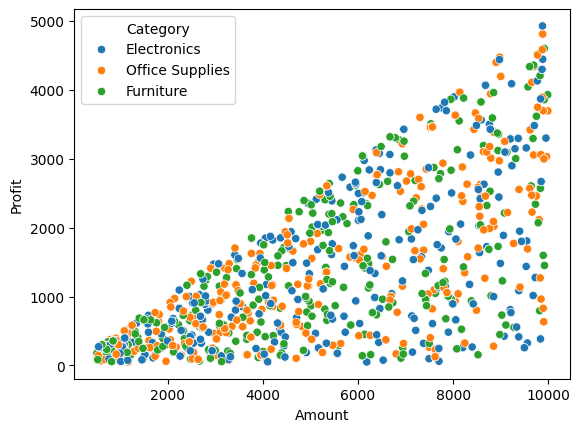

In [55]:
sns.scatterplot(data=df, x='Amount', y='Profit', hue='Category')

<Axes: xlabel='Year-Month'>

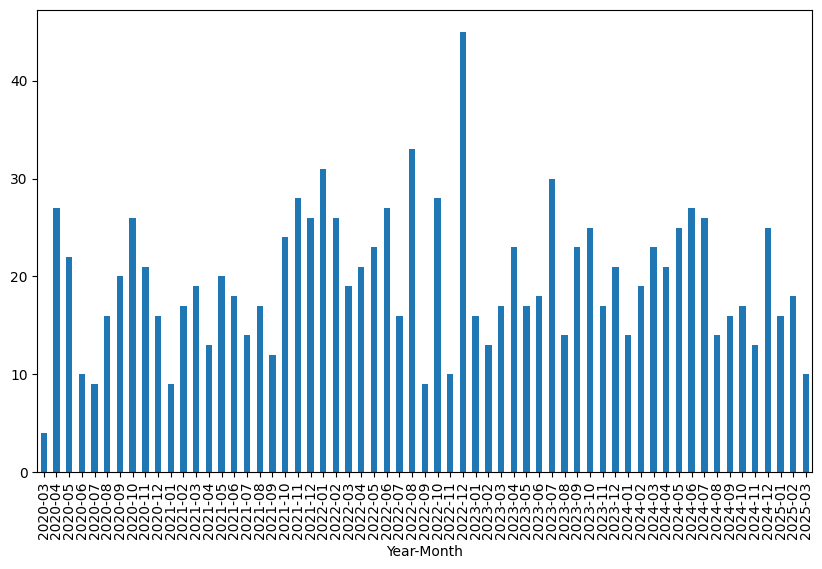

In [56]:
df['Order Count'] = 1
df.groupby('Year-Month')['Order Count'].count().plot(kind='bar', figsize=(10,6))

<Axes: >

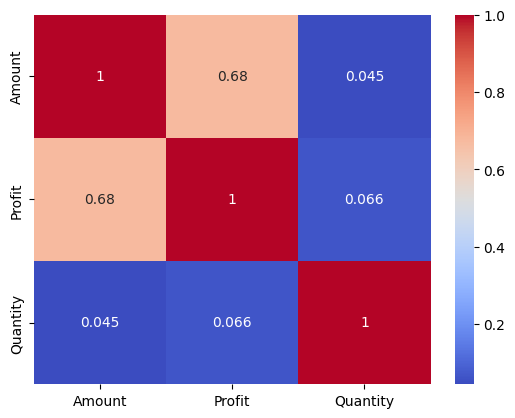

In [57]:
sns.heatmap(df[['Amount', 'Profit', 'Quantity']].corr(), annot=True, cmap='coolwarm')

# Modeling


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [59]:
df.drop(['Order ID', 'Order Date', 'CustomerName', 'Year-Month'], axis=1, inplace=True)

df.dropna(inplace=True)

In [60]:
le = LabelEncoder()

for col in ['Sub-Category', 'PaymentMode', 'State', 'City']:
    df[col] = le.fit_transform(df[col])

In [61]:
X = df.drop('Category', axis=1)
y = le.fit_transform(df['Category'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🧪 Model: Logistic Regression
✅ Accuracy: 36.82%

🧪 Model: Random Forest
✅ Accuracy: 98.33%

🧪 Model: Decision Tree
✅ Accuracy: 100.00%

🧪 Model: Naive Bayes
✅ Accuracy: 48.54%

🧪 Model: SVM
✅ Accuracy: 33.47%

🧪 Model: KNN
✅ Accuracy: 46.44%


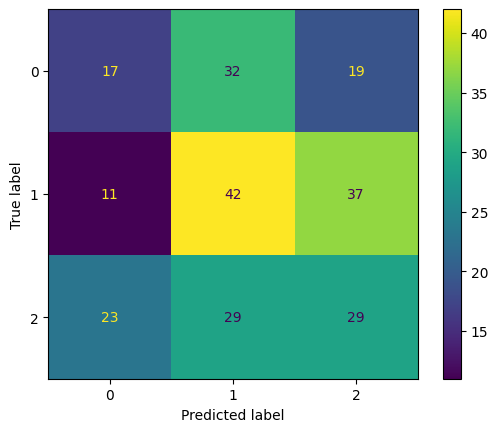

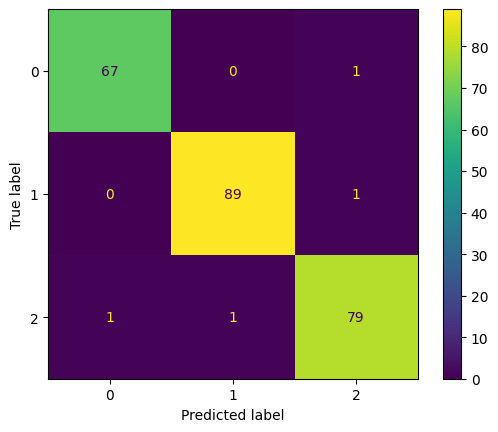

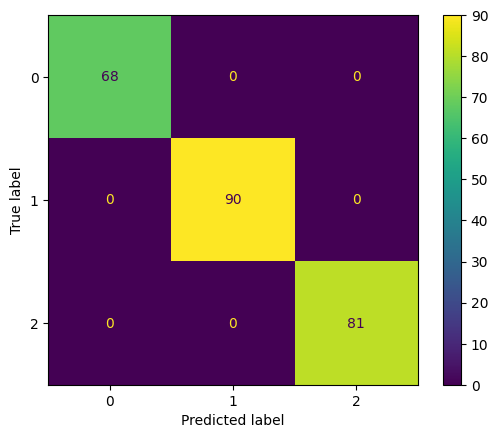

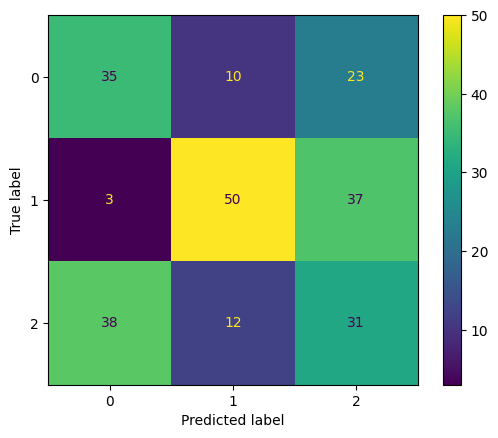

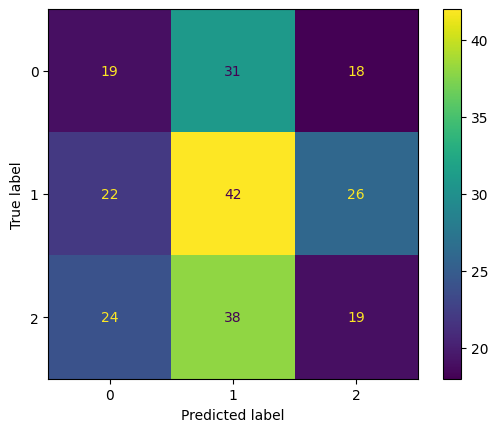

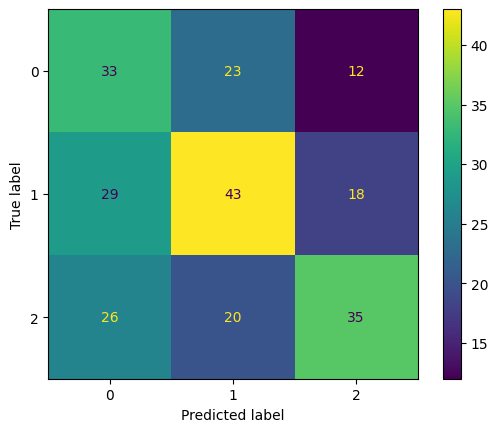

In [64]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100

    print(f"\n🧪 Model: {name}")
    print(f"✅ Accuracy: {acc:.2f}%")

    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()